# Program Optimization using `tket-py`

**Download this notebook - {nb-download}`Guppy-opt-example.ipynb`**



In [1]:
from hugr.hugr.render import DotRenderer, RenderConfig
from graphviz import Digraph


# Configure Hugr visualizer
my_renderer = DotRenderer(RenderConfig(display_node_id=True, display_metadata=False))

def draw(hugr: Hugr) -> Digraph:
    """Draw a Hugr graph with the DotRenderer."""
    return my_renderer.render(hugr)

## Getting started - Flattening the program

In [2]:
from guppylang import guppy
from guppylang.std.quantum import cx, h, qubit, t

In [3]:
@guppy
def pauli_zz_rotation(q0: qubit, q1: qubit) -> None:
    cx(q0, q1)
    t(q1)
    cx(q0, q1)

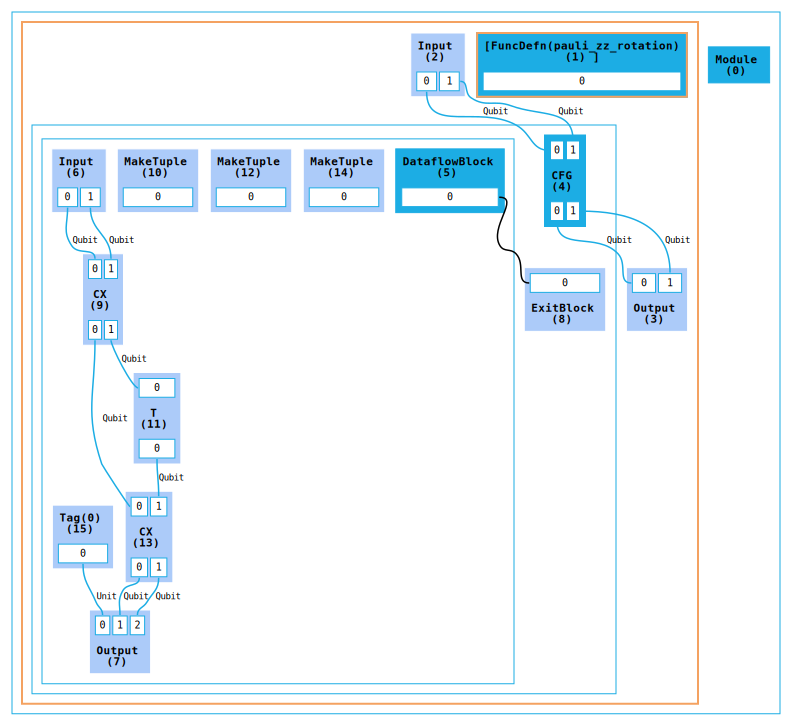

In [4]:
zz_hugr_graph = pauli_zz_rotation.compile_function().modules[0]
draw(zz_hugr_graph)

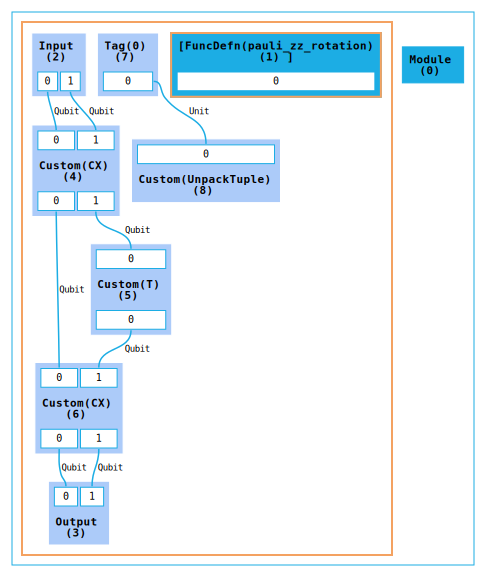

In [5]:
from tket.passes import NormalizeGuppy
from tket.circuit import Tk2Circuit
from hugr.hugr.base import Hugr

normalize_pass = NormalizeGuppy()

cleaned_zz_hugr = normalize_pass(zz_hugr_graph)

draw(cleaned_zz_hugr)

## Example 1: Cancelling redundant CX gates 

In [6]:
from guppylang import guppy
from guppylang.std.quantum import cx, h, qubit

@guppy
def redundant_cx(q0: qubit, q1: qubit) -> None:
    h(q0)
    # Two adjacent CX gates with the same control and target can be cancelled.
    cx(q0, q1)
    cx(q0, q1)

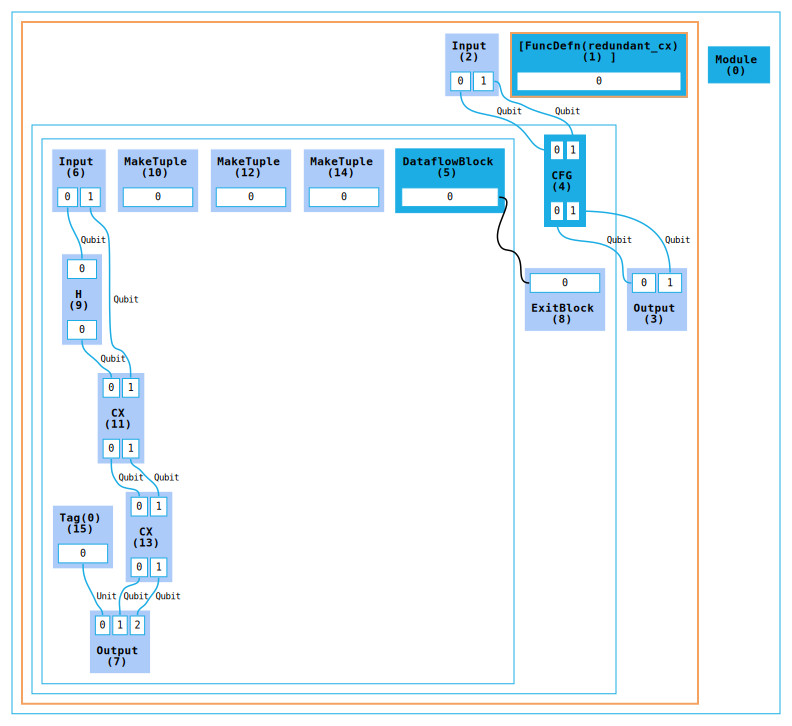

In [7]:
my_hugr_graph = redundant_cx.compile_function().modules[0]
draw(my_hugr_graph)

In [8]:
from tket.passes import PytketPass
from pytket.passes import RemoveRedundancies

rr_pass = PytketPass(RemoveRedundancies())

optimized_hugr = rr_pass(my_hugr_graph)

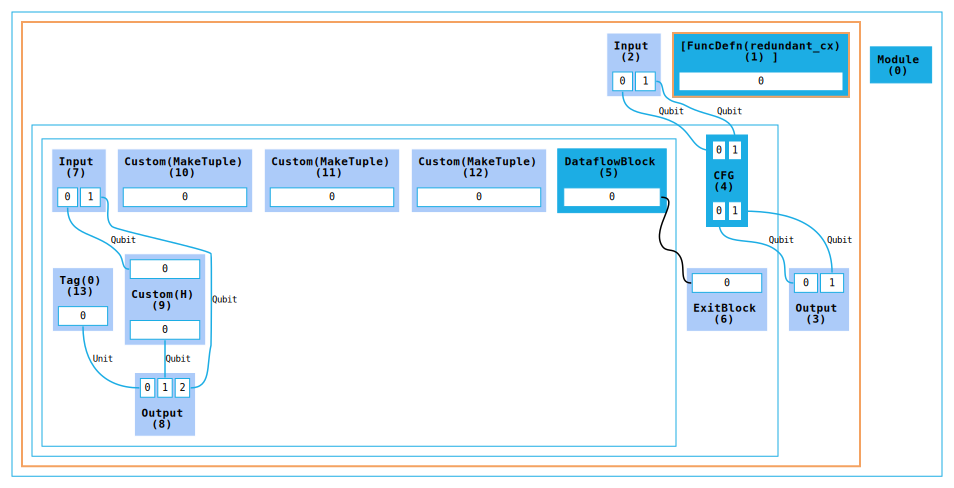

In [9]:
draw(optimized_hugr)